In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


%matplotlib inline

In [2]:
df_ = pd.read_csv('../data/datasetFinal_fifa2019.csv')

In [3]:
df = df_.drop(['ID',
 'Name',
 'Nationality',
 'Club',
 'Preferred Foot'], axis=1)

In [4]:
df_log = np.log(df)

In [5]:
df_log['avg'] = df_log[[ 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']].mean(axis=1)

In [6]:
df_avg = df_log[['Age', 'Overall', 'Potential', 'Wage', 'Special', 'International Reputation', 'Weight', 'avg']]

In [7]:
df_avg

,Age,Overall,Potential,Wage,Special,International Reputation,Weight,avg
0,3.433987,4.543295,4.543295,20.152336,7.697121,1.609438,5.068904,3.989570
1,3.496508,4.543295,4.543295,19.819398,7.708860,1.609438,5.209486,4.018711
2,3.258097,4.521789,4.532599,19.485391,7.669962,1.609438,5.010635,3.990875
3,3.295837,4.510860,4.521789,19.687628,7.732369,1.386294,5.036953,4.069581
4,3.295837,4.510860,4.510860,19.644456,7.669495,1.386294,5.093750,3.956479
...,...,...,...,...,...,...,...,...
14738,2.944439,3.850148,4.174387,13.815511,7.175490,0.000000,4.897840,3.553852
14739,2.944439,3.850148,4.143135,13.815511,7.001246,0.000000,5.135798,3.362332
14740,2.772589,3.850148,4.204693,13.815511,7.080868,0.000000,4.997212,3.393240
14741,2.833213,3.850148,4.189655,13.815511,7.113142,0.000000,5.036953,3.482159


In [8]:
fifa = df_avg.to_numpy()

In [9]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(fifa.data)

/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda2/envs/entorno/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda2/

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [10]:
embedding = reducer.transform(fifa.data)

embedding

array([[18.602158 ,  2.8264203],
       [18.598219 ,  2.8318133],
       [18.574184 ,  2.838897 ],
       ...,
       [-3.1445596, -2.0743709],
       [-3.1295261, -2.022901 ],
       [-3.4606817, -1.6386368]], dtype=float32)

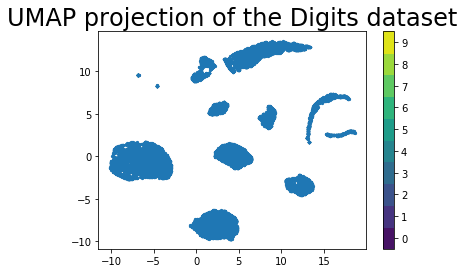

In [11]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

**kmeans**

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(fifa.data)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [13]:
kmeans.predict(fifa.data)

array([6, 6, 6, ..., 0, 0, 0], dtype=int32)

In [14]:
kmeans.cluster_centers_[0]

array([ 2.97880683e+00,  4.05178816e+00,  4.24321501e+00,  1.38155106e+01,
        7.27277063e+00, -1.16573418e-15,  5.06760396e+00,  3.62325576e+00])

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

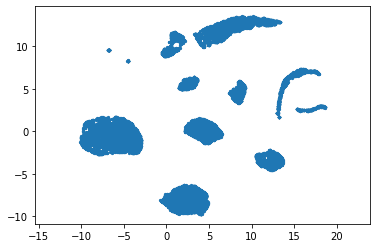

In [16]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')

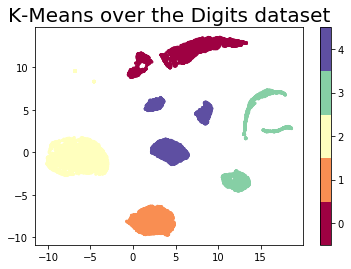

In [17]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=20);

## **DBSCAN**

In [27]:
import sklearn
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(embedding)

clustering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [28]:
clustering.labels_

array([0, 0, 0, ..., 4, 4, 4])

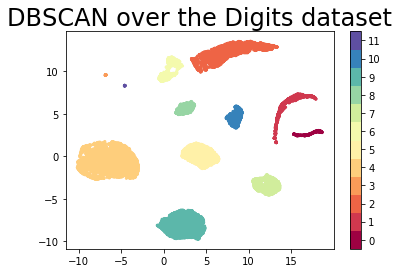

In [29]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

**HDBSCAN**

In [30]:
import hdbscan

clusterer = hdbscan.HDBSCAN()

clusterer.fit(embedding)

clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

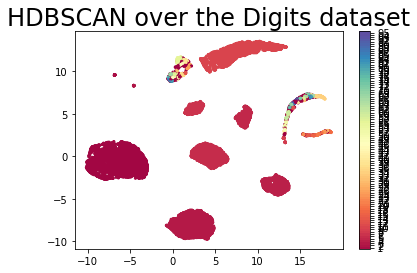

In [31]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clusterer.labels_)))+0.5).set_ticks(np.arange(len(np.unique(clusterer.labels_))))
plt.title('HDBSCAN over the Digits dataset', fontsize=24);

In [32]:
df_['cluster'] = clustering.labels_

In [33]:
sklearn.metrics.silhouette_score(embedding, clustering.labels_, metric='euclidean', sample_size=None, random_state=None)

0.6625944

In [25]:
df_.to_csv('clústers_fifa2019.csv')